In [45]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.figure

In [2]:
#Path to our csv files
stock_data = Path("Resources/GME_stock.csv")
reddit_data = Path("Resources/submissions_reddit.csv")

#Reading csv files into pandas
reddit_df = pd.read_csv(reddit_data)
stock_df = pd.read_csv(stock_data)
reddit_df

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,ko124i,[deleted],2021-01-01 00:02:06,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,...,Gain,1.00,34,0,1,14,0,[deleted],default,https://redd.it/ko124i
1,ko12uq,[deleted],2021-01-01 00:03:20,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,...,Gain,1.00,2,0,0,0,0,[deleted],default,https://redd.it/ko12uq
2,ko13df,[deleted],2021-01-01 00:04:11,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,...,Meme,0.88,13,0,0,7,0,[deleted],default,https://redd.it/ko13df
3,ko17yf,shirotimatim,2021-01-01 00:11:51,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,0,0,...,News,0.92,183,0,0,26,0,NaN,https://b.thumbs.redditmedia.com/LmWdNB0W1qHT0...,https://redd.it/ko17yf
4,ko1a4i,WSBVoteBot,2021-01-01 00:15:38,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,0,0,...,NaN,0.50,0,0,0,19,0,Every time a new submission is posted to walls...,self,https://redd.it/ko1a4i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775321,rt6e7q,[deleted],2021-12-31 23:44:10,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,Discussion,1.00,1,0,0,1,0,[removed],default,https://redd.it/rt6e7q
775322,rt6frk,Hychro617,2021-12-31 23:46:35,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,YOLO,1.00,1,0,0,1,0,[removed],self,https://redd.it/rt6frk
775323,rt6kgr,Lambaline,2021-12-31 23:53:41,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,0,...,Loss,1.00,2,0,0,3,0,NaN,https://b.thumbs.redditmedia.com/TtUVXN1XpoXXu...,https://redd.it/rt6kgr
775324,rt6kvg,[deleted],2021-12-31 23:54:17,2022-01-01 03:56:58,1970-01-01 00:00:00,0,0,0,1,1,...,Discussion,1.00,1,0,0,1,0,[deleted],default,https://redd.it/rt6kvg


In [3]:
#remove rows 2207-2225
reddit_clean_df = reddit_df
for x in range(2207,2225):    
    reddit_clean_df = reddit_clean_df.drop(axis = 0,index = x)
#verify rows were deleted    
reddit_clean_df.shape


(775308, 24)

In [4]:
#ID, created, deleted, title, link_flair,upvote_ratio, score, total_awards, num_comments, num_crosspost
reddit_clean_df = reddit_clean_df[["id", "created", "deleted", "title", "link_flair_text","upvote_ratio"
                                   , "score", "total_awards_received", "num_comments", "num_crossposts"]]
reddit_clean_df

,id,created,deleted,title,link_flair_text,upvote_ratio,score,total_awards_received,num_comments,num_crossposts
0,ko124i,2021-01-01 00:02:06,1,"3k - 170k since March (Also, buy LIT!!)",Gain,1.00,34,1,14,0
1,ko12uq,2021-01-01 00:03:20,1,Got out of PLTR calls after learning about IV ...,Gain,1.00,2,0,0,0
2,ko13df,2021-01-01 00:04:11,1,Hell of a headline,Meme,0.88,13,0,7,0
3,ko17yf,2021-01-01 00:11:51,0,"Top popular stocks on WSB too! Also, why they ...",News,0.92,183,0,26,0
4,ko1a4i,2021-01-01 00:15:38,0,WSBVoteBot Log for Jan 01 2021,NaN,0.50,0,0,19,0
...,...,...,...,...,...,...,...,...,...,...
775321,rt6e7q,2021-12-31 23:44:10,0,Winner or loser? Only time will tell. 2021 end...,Discussion,1.00,1,0,1,0
775322,rt6frk,2021-12-31 23:46:35,0,Stock Exchange,YOLO,1.00,1,0,1,0
775323,rt6kgr,2021-12-31 23:53:41,0,Solid first year on the stock market,Loss,1.00,2,0,3,0
775324,rt6kvg,2021-12-31 23:54:17,1,Fireworks outside Ryan Kagy’s virtual room! Ge...,Discussion,1.00,1,0,1,0


In [5]:
stock_df

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [6]:
#Filter Jan2021 and Jan2020 Stock Prices only
jan_2021_df = stock_df[stock_df['date'].str.contains('2021-01', na = False)].sort_values(by='date')
jan_2020_df = stock_df[stock_df['date'].str.contains('2020-01', na = False)].sort_values(by='date')

jan_2020_df

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
270,2020-01-02,6.14,6.47,6.07,6.31,4453600.0,6.31
269,2020-01-03,6.21,6.25,5.84,5.88,3543900.0,5.88
268,2020-01-06,5.80,5.91,5.60,5.85,3394800.0,5.85
267,2020-01-07,5.77,5.83,5.44,5.52,5228000.0,5.52
266,2020-01-08,5.49,5.85,5.41,5.72,5629400.0,5.72
265,2020-01-09,5.82,5.82,5.48,5.55,2643000.0,5.55
264,2020-01-10,5.56,5.60,5.38,5.43,2781400.0,5.43
263,2020-01-13,5.43,5.61,5.33,5.43,3625200.0,5.43
262,2020-01-14,4.78,5.00,4.53,4.71,12561900.0,4.71
261,2020-01-15,4.66,4.73,4.55,4.61,4981100.0,4.61


In [7]:
 #Find mean, median, min and max closing price
jan_2021_mean = jan_2021_df['close_price'].mean()
jan_2021_min = jan_2021_df['close_price'].min()
jan_2021_max = jan_2021_df['close_price'].max()
jan_2021_median = jan_2021_df['close_price'].median()

jan_2020_mean = jan_2020_df['close_price'].mean()
jan_2020_min = jan_2020_df['close_price'].min()
jan_2020_max = jan_2020_df['close_price'].max()
jan_2020_median = jan_2020_df['close_price'].median()
#Create a dataframe with those  summary stats

jan_2021_summary_stat = pd.DataFrame.from_dict({"Mean Closing Price in Jan": [jan_2021_mean,jan_2020_mean],
                                                "Median Closing Price in Jan":[jan_2021_median,jan_2020_median],
                                                "Minimum Closing Price in Jan":[jan_2021_min, jan_2020_min],
                                                "Maximum Closing Price in Jan":[jan_2021_max,jan_2020_max]}, orient = 'index')
jan_2021_summary_stat.rename(columns={0:"2021",1:"2020"})


,2021,2020
Mean Closing Price in Jan,65.991668,4.898095
Median Closing Price in Jan,37.309999,4.620000
Minimum Closing Price in Jan,17.250000,3.840000
Maximum Closing Price in Jan,347.510010,6.310000


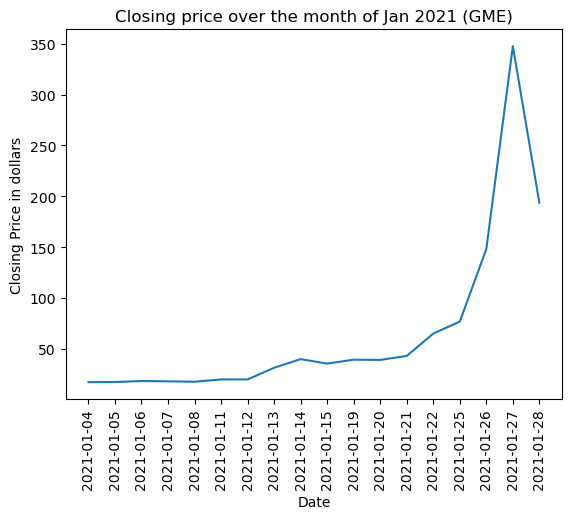

In [33]:
#Plot of the closing price in Jan 2021
stock_plot = plt.plot(jan_2021_df['date'],jan_2021_df['close_price'])
plt.xlabel('Date')
plt.ylabel('Closing Price in dollars')
plt.title('Closing price over the month of Jan 2021 (GME)')
plt.xticks(rotation="vertical")
plt.show()

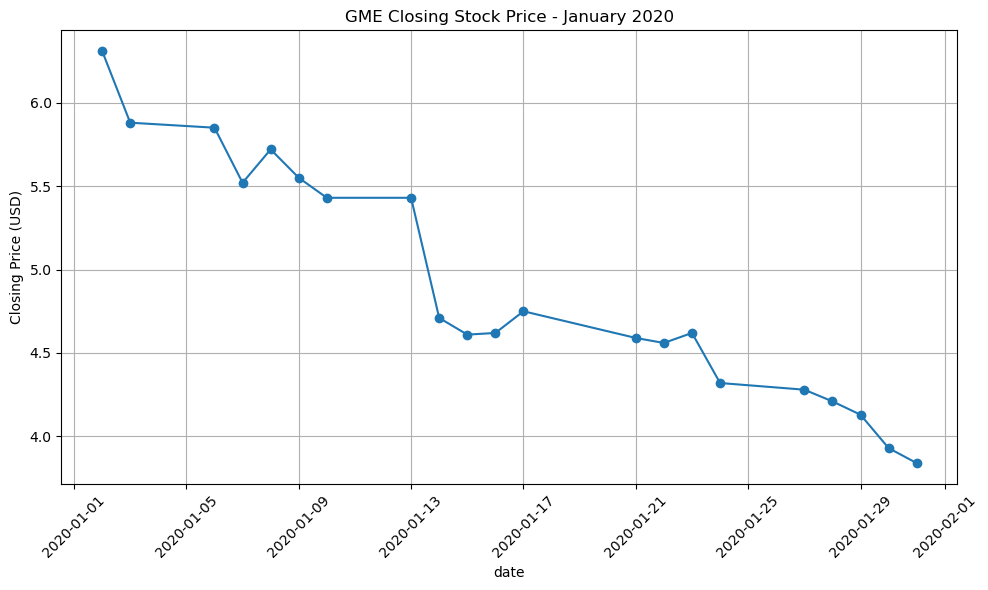

In [10]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

# Filter the DataFrame for January 2020 data
jan_2020_stock = stock_df[(stock_df['date'].dt.year == 2020) & (stock_df['date'].dt.month == 1)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(jan_2020_stock['date'], jan_2020_stock['close_price'], marker='o', linestyle='-')
plt.title('GME Closing Stock Price - January 2020')
plt.xlabel('date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

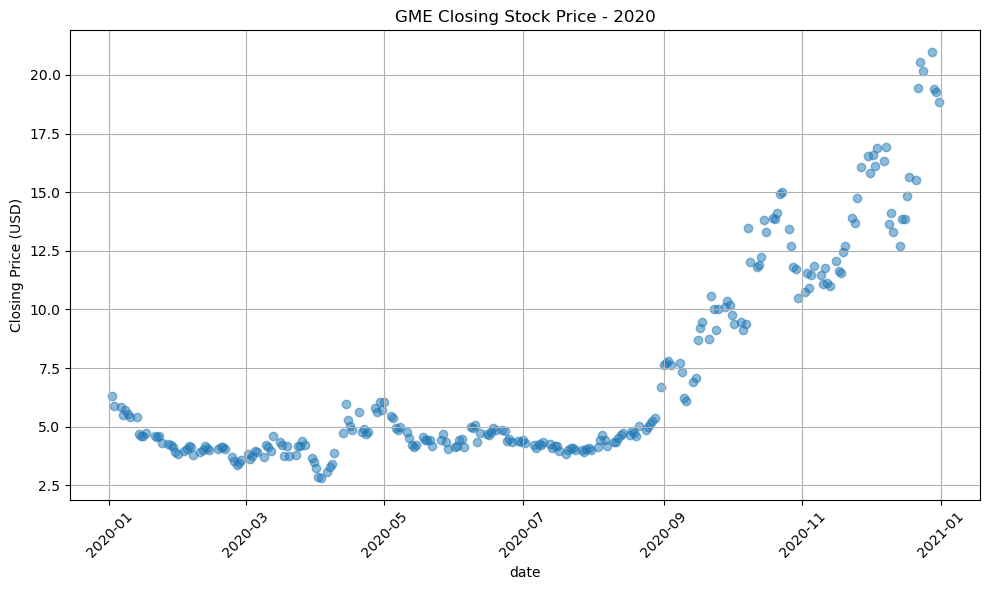

Correlation Coefficient: 0.8000050013164536


In [11]:
# Convert the 'Date' column to datetime format
stock_df['date'] = pd.to_datetime(stock_df['date'])

# Filter the DataFrame for 2020 data
stock_2020 = stock_df[stock_df['date'].dt.year == 2020]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(stock_2020['date'], stock_2020['close_price'], alpha=0.5)
plt.title('GME Closing Stock Price - 2020')
plt.xlabel('date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation_coefficient = stock_2020['date'].corr(stock_2020['close_price'])
print("Correlation Coefficient:", correlation_coefficient)

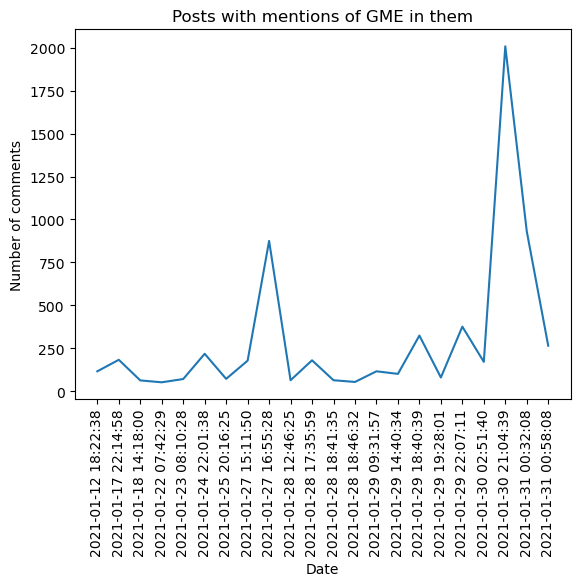

In [48]:
#filter out only only january posts
jan2021_reddit = reddit_clean_df[reddit_clean_df['created'].str.contains('2021-01', na = False)].sort_values(by='created')
#Plot the posts with only mentions of gme that has over 50 comments
reddit_gme  = jan2021_reddit[jan2021_reddit['title'].str.contains('gme', na = False)].sort_values(by='created')
comments = reddit_gme.loc[reddit_gme['num_comments']>50]
comment_plot =plt.plot(comments['created'], comments['num_comments'])
plt.xticks(rotation="vertical")
plt.xlabel('Date')
plt.ylabel('Number of comments')
plt.title('Posts with mentions of GME in them')
plt.show()

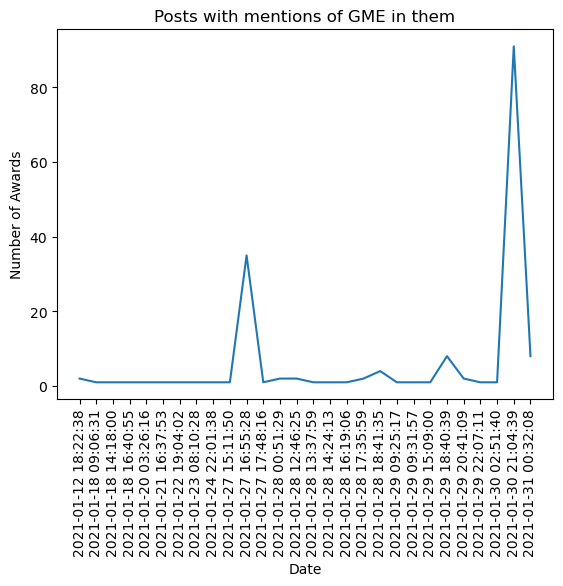

In [42]:
awards = reddit_gme.loc[reddit_gme['total_awards_received']>0]
awards_plot = plt.plot(awards['created'], awards['total_awards_received'])
plt.xticks(rotation="vertical")
plt.xlabel('Date')
plt.ylabel('Number of Awards')
plt.title('Posts with mentions of GME in them')
plt.show()